<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-gerardoaaron_castanedajaramillo/blob/main/Actividad%20Semanal%20--%204.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

> # **Actividad Semanal -- 4**
>## **Maestría en Inteligencia Artificial Aplicada**
>### **Curso: TC4029.10 Ciencia y analítica de datos (Gpo 10)**
>## **Tecnológico de Monterrey**
>## **Prof: Jobish Vallikavungal Devassia**




### **Gerardo Aaron Castañeda Jaramillo  -  Matrícula A01137646**
### **5 de octubre del 2022**

## **Parte 1: Ejercicio guiado**

In [16]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn import preprocessing

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/PosgradoMNA/Actividades_Aprendizaje-/main/default%20of%20credit%20card%20clients.csv', index_col = 0)
df.index.name = None

### Formato dado en anterior ejercicio a la base de datos

In [3]:
df_norm = df.copy()

#eliminamos valores mayores a 4 en X3 
X3_values = []
for i in range(0,len(df_norm.index)):
  if df_norm['X3'].iloc[i] > 4:
    if df_norm['X3'].iloc[i] not in X3_values:
      X3_values.append(int(df_norm['X3'].iloc[i]))
for i in X3_values:
  df_norm['X3'].replace(i,4,inplace=True)

#sustituimos valores de x3 de 0 por valor 4 de others
df_norm['X3'].replace(0,4,inplace=True)

#sustituimos valores de 0 en X4 por por 3, ya que entra dentro de el valor 3 = others
df_norm['X4'].replace(0,3,inplace=True)

#cambimos valores de -2 de X6 a X11 por -1
df_norm.iloc[:,5:11] = df_norm.iloc[:,5:11].replace(-2,-1)

#cambiamos valores negativos de X12 a X24
for col in df_norm.iloc[:,11:23].columns:
  df_norm[col] = df_norm[col].abs()

#eliminamos las filas con valores nulos, que representan 42/30000
df_norm.dropna(axis=0,inplace=True)

Cambiaremos los nombres de las columnas para su mas facil visualizacion

In [41]:
columns_name = ['BAL','SEX','EDUCATION','MARRIAGE','AGE','PAYSTAT_1','PAYSTAT_2','PAYSTAT_3','PAYSTAT_4','PAYSTAT_5','PAYSTAT_6','BILL_1','BILL_2','BILL_3','BILL_4','BILL_5','BILL_6','PAY_1',
                'PAY_2','PAY_3','PAY_4','PAY_5','PAY_6','Y']
df_norm.columns = columns_name
df_norm.columns

Index(['BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAYSTAT_1', 'PAYSTAT_2',
       'PAYSTAT_3', 'PAYSTAT_4', 'PAYSTAT_5', 'PAYSTAT_6', 'BILL_1', 'BILL_2',
       'BILL_3', 'BILL_4', 'BILL_5', 'BILL_6', 'PAY_1', 'PAY_2', 'PAY_3',
       'PAY_4', 'PAY_5', 'PAY_6', 'Y'],
      dtype='object')

Analizamos la base de datos con formato

## **Paso 1: Determine el número mínimo de componentes principales que representan la mayor parte de la variación en sus datos**

Comenzamos separando los valores de entrada al modelo de los valores Y

In [42]:
dfw = df_norm.copy()

Y_values = dfw['Y']
x_values = dfw.drop('Y',axis=1)

Para aplicar PCA utilizamos el metodo de preprocessing de "scale" para tener todas las columnas en una misma escala

In [43]:
pcs = PCA()
pcs.fit(preprocessing.scale(x_values)) 

PCA()

Presentamos la variacion estandar, el proporcion de variacion estandar, y la proporcion cumulativa en base los componentes principales

In [44]:
pcsSummary_df = pd.DataFrame({'Standard deviation': np.sqrt(pcs.explained_variance_),
                             'Proportion of variance': pcs.explained_variance_ratio_,
                             'Cumulative proportion': np.cumsum(pcs.explained_variance_ratio_)
                             })

pcsSummary_df = pcsSummary_df.transpose()
pcsSummary_df.columns = ['PC{}'.format(i) for i in range(1, len(pcsSummary_df.columns) + 1)]
pcsSummary_df.round(4) 

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23
Standard deviation,2.5123,2.0276,1.2398,1.2102,1.0128,0.9874,0.9592,0.9423,0.9327,0.8852,...,0.7247,0.6569,0.5467,0.5033,0.4772,0.4088,0.2668,0.2016,0.1603,0.1536
Proportion of variance,0.2744,0.1787,0.0668,0.0637,0.0446,0.0424,0.0400,0.0386,0.0378,0.0341,...,0.0228,0.0188,0.0130,0.0110,0.0099,0.0073,0.0031,0.0018,0.0011,0.0010
Cumulative proportion,0.2744,0.4532,0.5200,0.5837,0.6283,0.6706,0.7106,0.7492,0.7871,0.8211,...,0.9331,0.9518,0.9648,0.9758,0.9857,0.9930,0.9961,0.9979,0.9990,1.0000


Evaluamos en base a la proporcion cumulativa cuantos componentes principales son necesarios para llegar a una variabilidad arriba al 90%

In [45]:
pcsSummary_df.iloc[2,12]

0.9102341667380265

*   El primer componente principal abarca unicamente un 27% de la variabilidad
*   Es necesario abarcar hasta PC12 para llegar a un 91% de variabilidad
*   Reducir el numero de variables a menos de 12 significaria una perdida de variabilidad considerable

### El numero **minimo de componentes principales** para el modelo son **12**

## **Paso 2: Interprete cada componente principal en términos de las variables originales**

Comenzamos usando el metodo de .transpose() para acomodar los componentes principales en las columnas, contra los nombres de las columnas de la base de datos original. Para asi poder visualizar el impacto de las variables originales sobre los componentes principales. 

In [46]:
pcsComponents_df = pd.DataFrame(pcs.components_.transpose(), 
                                columns=pcsSummary_df.columns,
                                index=x_values.columns
                                )
pcsComponents_df.iloc[:,:12]

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12
BAL,0.091638,0.296007,0.002024,0.086406,-0.201029,-0.389330,0.116019,-0.022836,0.014463,0.011844,-0.004662,0.021619
SEX,-0.020013,0.030720,0.035849,-0.076578,0.836091,-0.493731,0.047998,-0.000020,0.010955,0.025464,0.022366,-0.050790
EDUCATION,0.011833,-0.097039,-0.351762,0.181227,0.423404,0.529667,-0.366899,-0.000865,-0.127883,0.065020,-0.111696,0.156625
MARRIAGE,-0.011474,-0.036329,0.515563,-0.367047,-0.022137,0.285825,-0.149363,-0.009720,-0.047898,0.039708,-0.071067,0.074967
AGE,0.020404,0.056296,-0.532613,0.388699,-0.159246,-0.059272,0.075586,-0.006081,0.037601,0.008580,-0.035022,-0.000125
PAYSTAT_1,0.136321,-0.312537,-0.006848,0.035161,-0.035000,-0.053352,-0.159410,0.046131,-0.031185,0.008681,0.383698,-0.438556
PAYSTAT_2,0.160257,-0.349301,0.013882,0.055486,-0.044026,-0.064132,-0.161291,0.045825,-0.034420,0.015089,0.277703,-0.297440
PAYSTAT_3,0.163160,-0.359891,0.054066,0.094227,-0.031728,-0.073836,-0.047687,-0.002083,-0.027427,-0.025352,-0.040645,-0.175681
PAYSTAT_4,0.168784,-0.364645,0.076496,0.124406,-0.019252,-0.089147,0.063530,-0.071834,0.034195,-0.081082,-0.135696,0.157265
PAYSTAT_5,0.173542,-0.352703,0.094631,0.132065,-0.008082,-0.079570,0.158101,-0.063029,0.063610,0.076649,-0.198053,0.287131


Ahora evaluamos las variables mayor valor absoluto en los coeficientes

In [80]:
for pc in pcsComponents_df.iloc[:,:12]:
  print('Top 3 variables con mayores coeficientes en magnitud de: ' + pc)
  indexes_abs = pcsComponents_df[pc].abs().nlargest(3).index
  individual_pc = pcsComponents_df[pc]
  print(individual_pc[indexes_abs])

Top 3 variables con mayores coeficientes en magnitud de: PC1
BILL_4    0.369041
BILL_5    0.366819
BILL_3    0.364778
Name: PC1, dtype: float64
Top 3 variables con mayores coeficientes en magnitud de: PC2
PAYSTAT_4   -0.364645
PAYSTAT_3   -0.359891
PAYSTAT_5   -0.352703
Name: PC2, dtype: float64
Top 3 variables con mayores coeficientes en magnitud de: PC3
AGE         -0.532613
MARRIAGE     0.515563
EDUCATION   -0.351762
Name: PC3, dtype: float64
Top 3 variables con mayores coeficientes en magnitud de: PC4
AGE         0.388699
MARRIAGE   -0.367047
PAY_2       0.358318
Name: PC4, dtype: float64
Top 3 variables con mayores coeficientes en magnitud de: PC5
SEX          0.836091
EDUCATION    0.423404
BAL         -0.201029
Name: PC5, dtype: float64
Top 3 variables con mayores coeficientes en magnitud de: PC6
EDUCATION    0.529667
SEX         -0.493731
BAL         -0.389330
Name: PC6, dtype: float64
Top 3 variables con mayores coeficientes en magnitud de: PC7
PAY_5       -0.695526
EDUCATION  

Y donde podemos ver las 3 variables con mayor magnitud de cada componente pinricipal y su direccion en base a su signo

## **Paso 3: Identifique valores atípicos**

Para identificar los valores atipicos generaremos graficas de boxplot de cada componente principal

In [81]:
import seaborn as sns 
import matplotlib.pyplot as plt

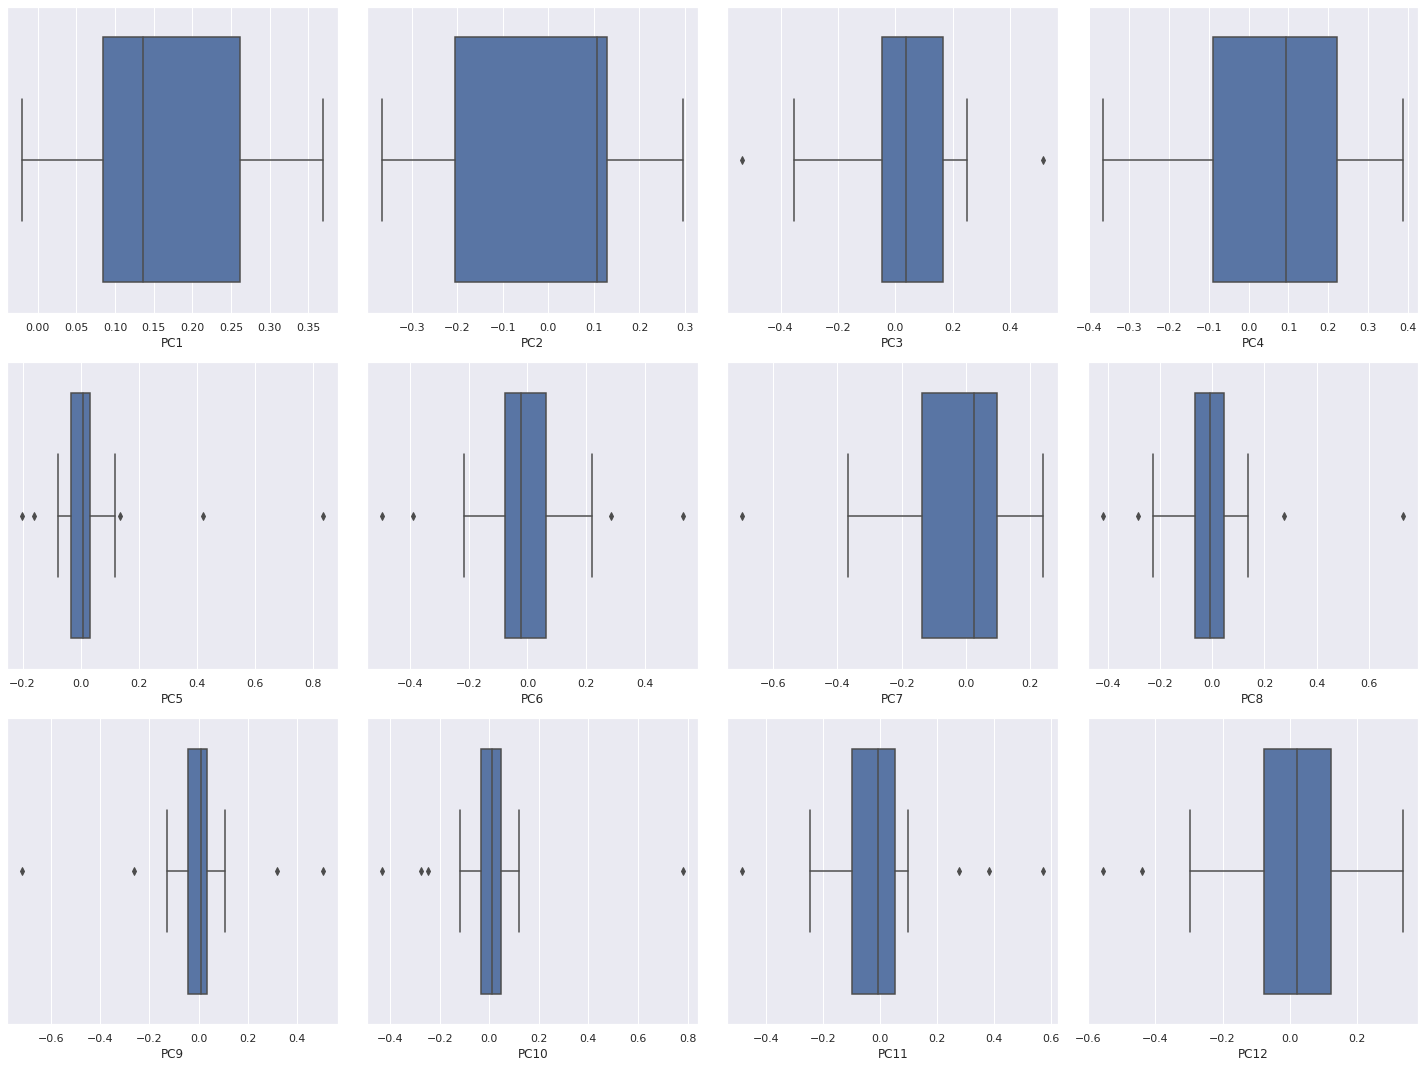

In [101]:
sns.set(rc={'figure.figsize':(20,15)})
fig, ax =plt.subplots(3,4)
j = 0
k = 0
for pc in pcsComponents_df.iloc[:,:12]:
  sns.boxplot(x=pcsComponents_df[pc],ax=ax[k,j])
  j = j + 1
  if j > 3:
    k = k + 1
    j = 0
plt.tight_layout()

Donde podemos observar que PC3, PC5, PC6, PC7, PC8, PC9, PC10, PC11 y PC12 tienen valores atipicos

mugrero que hice despues

In [47]:
pcsComponents_df = pd.DataFrame(pcs.components_.transpose(), 
                                columns=pcsSummary_df.columns,
                                index=x_values.columns
                                )
pcsComponents_df.iloc[:,:11]

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
BAL,0.091638,0.296007,0.002024,0.086406,-0.201029,-0.389330,0.116019,-0.022836,0.014463,0.011844,-0.004662
SEX,-0.020013,0.030720,0.035849,-0.076578,0.836091,-0.493731,0.047998,-0.000020,0.010955,0.025464,0.022366
EDUCATION,0.011833,-0.097039,-0.351762,0.181227,0.423404,0.529667,-0.366899,-0.000865,-0.127883,0.065020,-0.111696
MARRIAGE,-0.011474,-0.036329,0.515563,-0.367047,-0.022137,0.285825,-0.149363,-0.009720,-0.047898,0.039708,-0.071067
AGE,0.020404,0.056296,-0.532613,0.388699,-0.159246,-0.059272,0.075586,-0.006081,0.037601,0.008580,-0.035022
PAYSTAT_1,0.136321,-0.312537,-0.006848,0.035161,-0.035000,-0.053352,-0.159410,0.046131,-0.031185,0.008681,0.383698
PAYSTAT_2,0.160257,-0.349301,0.013882,0.055486,-0.044026,-0.064132,-0.161291,0.045825,-0.034420,0.015089,0.277703
PAYSTAT_3,0.163160,-0.359891,0.054066,0.094227,-0.031728,-0.073836,-0.047687,-0.002083,-0.027427,-0.025352,-0.040645
PAYSTAT_4,0.168784,-0.364645,0.076496,0.124406,-0.019252,-0.089147,0.063530,-0.071834,0.034195,-0.081082,-0.135696
PAYSTAT_5,0.173542,-0.352703,0.094631,0.132065,-0.008082,-0.079570,0.158101,-0.063029,0.063610,0.076649,-0.198053


In [28]:
pcsComponents_df.PC1.idxmax()

'X15'

In [29]:
pcsComponents_df.PC1.nlargest(3)

X15    0.369041
X16    0.366819
X14    0.364778
Name: PC1, dtype: float64

In [30]:
pcsComponents_df.PC2.idxmin()

'X9'

In [31]:
pcsComponents_df.PC2.nsmallest(3)

X9    -0.364645
X8    -0.359891
X10   -0.352703
Name: PC2, dtype: float64

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

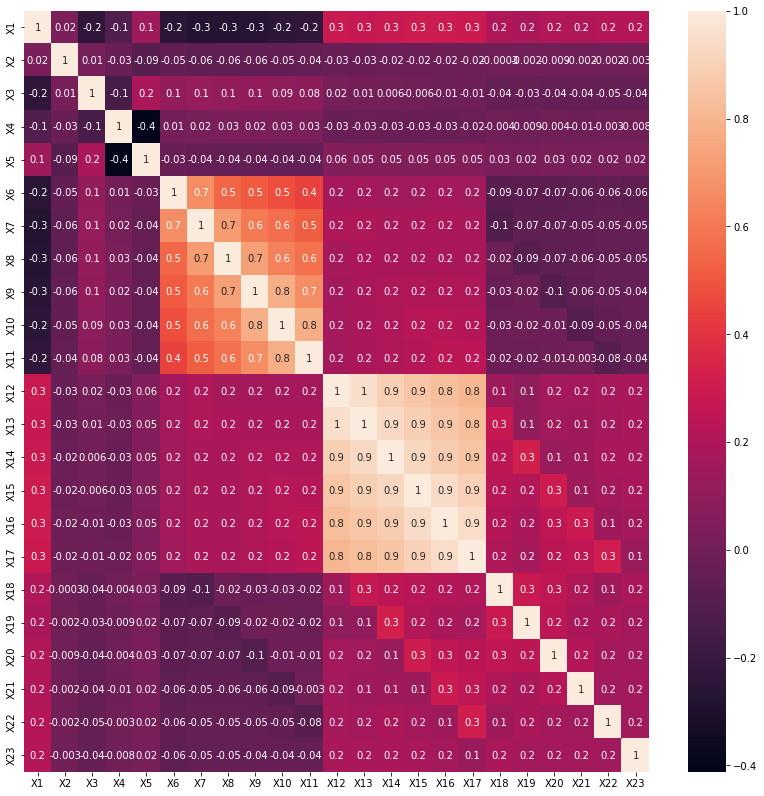

In [7]:
corr = x_values.corr()
plt.figure(figsize=(14, 14))
sns.heatmap(corr, annot=True, fmt='.1g')

Notamos una alta correlacion entre X6-X11 y X12-X17

In [9]:
X6X11 = ['X' + str(i) for i in range(6, 12)]
print(X6X11)
#VarienceX6X11= np.cov(x_values[X6X11])
#VarienceX6X11

['X6', 'X7', 'X8', 'X9', 'X10', 'X11']


In [9]:
t= x_values.var().sum()
print('Total Varience \t\t\t:', t.round(2))
for i in range(0,len(x_values.columns)):
  print('Variance prop. of' + str(x_values.columns[i]) + ': ' + str(((Varience[i][i]/t)*100).round(2)) + '%')

Total Varience 			: 45411003381.61
Variance prop. ofX1: 0.04%
Variance prop. ofX2: 1.36%
Variance prop. ofX3: 0.83%
Variance prop. ofX4: 0.83%
Variance prop. ofX5: 0.45%
Variance prop. ofX6: 1.06%
Variance prop. ofX7: 100.92%
Variance prop. ofX8: 0.95%
Variance prop. ofX9: 1.85%
Variance prop. ofX10: 0.08%
Variance prop. ofX11: 3.78%
Variance prop. ofX12: 6.28%
Variance prop. ofX13: 37.68%
Variance prop. ofX14: 1.76%
Variance prop. ofX15: 6.82%
Variance prop. ofX16: 0.66%
Variance prop. ofX17: 0.15%
Variance prop. ofX18: 23.77%
Variance prop. ofX19: 3.1%
Variance prop. ofX20: 1.77%
Variance prop. ofX21: 1.38%
Variance prop. ofX22: 1.15%
Variance prop. ofX23: 19.26%


In [ ]:
pcs = PCA()
pcs.fit(preprocessing.scale(dfw))

In [69]:
pcsSummary_df = pd.DataFrame({'Standard deviation': np.sqrt(pcs.explained_variance_),
                             'Proportion of variance': pcs.explained_variance_ratio_,
                             'Cumulative proportion': np.cumsum(pcs.explained_variance_ratio_)
                             })

pcsSummary_df = pcsSummary_df.transpose()
pcsSummary_df.columns = ['PC{}'.format(i) for i in range(1, len(pcsSummary_df.columns) + 1)]
pcsSummary_df.round(4) 

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24
Standard deviation,2.5137,2.0601,1.2403,1.2127,1.0203,0.9935,0.9645,0.9497,0.9378,0.9327,...,0.7243,0.6515,0.5462,0.5030,0.4771,0.4088,0.2668,0.2016,0.1603,0.1536
Proportion of variance,0.2633,0.1768,0.0641,0.0613,0.0434,0.0411,0.0388,0.0376,0.0366,0.0362,...,0.0219,0.0177,0.0124,0.0105,0.0095,0.0070,0.0030,0.0017,0.0011,0.0010
Cumulative proportion,0.2633,0.4401,0.5042,0.5655,0.6088,0.6500,0.6887,0.7263,0.7629,0.7992,...,0.9362,0.9539,0.9663,0.9768,0.9863,0.9933,0.9963,0.9979,0.9990,1.0000


In [70]:
pcsSummary_df.iloc[2,11]

0.8624463687138665

In [71]:
pcsComponents_df = pd.DataFrame(pcs.components_.transpose(), 
                                columns=pcsSummary_df.columns,
                                index=dfw.columns
                                )
pcsComponents_df.iloc[:,:11]

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
X1,0.088457,0.290322,-0.004932,0.096891,-0.261720,-0.278178,-0.244001,-0.056852,-0.028084,0.015721,0.012625
X2,-0.020449,0.030789,0.038433,-0.076928,0.661693,-0.707763,-0.049673,0.061530,0.049674,0.009556,0.021573
X3,0.013311,-0.094058,-0.353054,0.154684,0.507824,0.336611,0.474361,-0.092120,-0.026270,-0.125629,0.072116
X4,-0.011451,-0.032366,0.528386,-0.349248,0.009899,0.233489,0.212577,-0.022380,0.013402,-0.047973,0.042299
X5,0.020141,0.052246,-0.545574,0.369680,-0.130114,0.025423,-0.127641,-0.024538,-0.025932,0.038935,0.010488
X6,0.140427,-0.310321,-0.009640,0.040733,-0.120052,-0.132995,0.241013,0.107192,0.103280,-0.037014,-0.016706
X7,0.164228,-0.341569,0.013883,0.052330,-0.073414,-0.080267,0.151529,-0.013674,-0.009242,-0.035116,0.000683
X8,0.166995,-0.349744,0.054988,0.086363,-0.013713,-0.031898,-0.022751,-0.084306,-0.051421,-0.025133,-0.025621
X9,0.172522,-0.353044,0.077884,0.113275,0.032958,-0.000970,-0.181232,-0.143798,-0.051727,0.038035,-0.070126
X10,0.177118,-0.341010,0.095905,0.120778,0.057064,0.021693,-0.266032,-0.106646,-0.059911,0.067636,0.092108


In [72]:
pcsComponents_df.PC1.idxmax()

'X15'

In [63]:
pcsComponents_df.PC1.nlargest(3)

X15    0.367494
X16    0.365316
X14    0.363204
Name: PC1, dtype: float64

In [64]:
pcsComponents_df.PC2.idxmin()

'X9'

In [65]:
pcsComponents_df.PC2.nsmallest(3)

X9   -0.353032
X8   -0.349727
X7   -0.341558
Name: PC2, dtype: float64